# Modelo Sazonal Auto Regressivo Integrado Média Móvel

Utilizando modelo SARIMA para modelar a série temporal

Utilizaremos uma série temporal do número de passageiros de uma linha de trem

* Importando biblitecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

* Lendo arquivo CSV

In [3]:
dados = pd.read_csv('Passageiros.csv')

Exibindo cinco primeiras linhas

In [4]:
dados.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


* Removendo coluna ID

In [5]:
dados = dados.drop('ID',axis=1)

* Definindo data como índice

In [6]:
dados['Datetime'] = pd.to_datetime(dados['Datetime'])
dados = dados.set_index('Datetime')

* Número de passageiros diário

In [7]:
dados =  dados.resample('D').sum()
dados= dados.dropna()

* Graficando série temporal

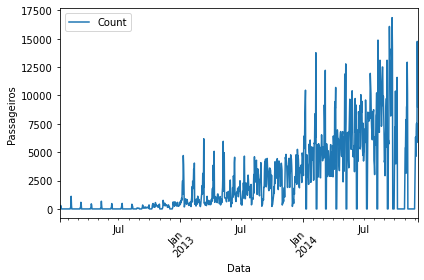

In [8]:
dados.plot()
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Passageiros')
plt.tight_layout()

In [9]:
t_treino = dados[dados.index<'2014-06-01'].index.values
t_teste = dados[dados.index>='2014-06-01'].index.values
X_treino = dados[dados.index<'2014-06-01'].values
X_teste = dados[dados.index>='2014-06-01'].values

* Aplicando modelo SARIMA

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [11]:
modelo = SARIMAX(X_treino, order=(2,1,1), seasonal_order=(0,1,1,12))
resultado = modelo.fit()

* Coeficientes

In [12]:
print('Coefficients: %s' % resultado.params)

Coefficients: [ 4.75409135e-01  1.26490708e-02 -9.99970849e-01 -8.95959834e-01
  1.65610396e+06]


* Fazendo predições

In [13]:
X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)

* Calculando erros

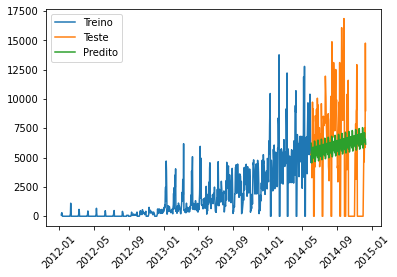

In [14]:
plt.plot(t_treino,X_treino,label='Treino')
plt.plot(t_teste,X_teste,label='Teste')
plt.plot(t_teste,X_pred,label='Predito')
plt.xticks(rotation=45)
plt.legend()

* Calculando erros

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
MSE = mean_squared_error(X_teste,X_pred)

In [17]:
RMSE = np.sqrt(MSE)

In [18]:
print("RMSE = {:0.2f}".format(RMSE))

RMSE = 4639.34
